# Flow-weighted riverine $\mathsf{\delta^{18}O}$ export and end-member values

* This notebook shows my work of $\mathsf{\delta^{18}O}$'s river export.
* I found it is good to use constants.

# Content
1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Define functions**](#Define-functions)
1. [**d18O records**](#d18O-records)
  2. [Read datasets](#Read-datasets)
  2. [Combine datasets to series](#Combine-datasets-to-series)
  2. [Reconstruct to monthly mean values](#Reconstruct-to-monthly-mean-values)
1. [**River discharge**](#River-discharge)
1. [**Check the seasonality**](#Check-the-seasonality)
1. [**Flow-weighted end member values**](#Flow-weighted end member values)

# Import modules and tools

In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts
from Mat2Py import datenum2datetime, datetime2datenum_single 

In [2]:
import glob
import scipy.io
import datetime
import numpy as np
import matplotlib.pyplot as plt
#from seaborn import xkcd_rgb as xcolor
% matplotlib inline

In [3]:
reload(Nts)

<module 'NEMO_tools' from '_libs/NEMO_tools.pyc'>

# Define functions

In [191]:
def mutifig6(SIZE=(12, 7)):
    fig=plt.figure(figsize=SIZE)
    plt.subplots_adjust(hspace = 0.15)
    ax1=plt.subplot2grid((3, 2), (0, 0), colspan=1, rowspan=1)
    ax2=plt.subplot2grid((3, 2), (0, 1), colspan=1, rowspan=1)
    ax3=plt.subplot2grid((3, 2), (1, 0), colspan=1, rowspan=1)
    ax4=plt.subplot2grid((3, 2), (1, 1), colspan=1, rowspan=1)
    ax5=plt.subplot2grid((3, 2), (2, 0), colspan=1, rowspan=1)
    ax6=plt.subplot2grid((3, 2), (2, 1), colspan=1, rowspan=1)
    AX = [ax1, ax2, ax3, ax4, ax5, ax6]
    return fig, AX

In [5]:
Mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [173]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran
SB=[0.06, 0.05, 0.03]    # Smokey Black
AFB = [0.36, 0.54, 0.66] # Air Force Blue
AG = [0.55, 0.71, 0.0]   # Apple Green
AZ = [0.0, 0.5, 1.0]     # Azure
CB = [0.37, 0.62, 0.63]  # Cadet blue
SP = [1.0, 0.72, 0.77]   # Sakura
CamB = [0.64, 0.76, 0.68]# Cambridge blue
DC = [0.0, 0.55, 0.55]   # Dark cyan
DE = [0.08, 0.38, 0.74]  # Denim
BB = [0.54, 0.81, 0.94]  # Baby blue
EG = [0.94, 0.92, 0.84]  # Egg shell

# d18O records

Datasets are downloaded from <a href='http://www.arcticgreatrivers.org/data'>**Arctic Great River Observatory**</a>. All datasets have been preprocessed in MATLAB.

The unit is thousand precent.

<table align="left">
<tr>
<th>River</th>
<th>Station</th>
<th>Longitude</th>
<th>Latitude</th>
</tr>
<tr>
<td>Lena</td>
<td>Zhigansk</td>
<td>123°22' E</td>
<td>66°46' N</td>
</tr>
<tr>
<td>Kolyma</td>
<td>Cherskiy</td>
<td>161°18' E</td>
<td>68°45' N</td>
</tr>
<tr>
<td>Yenisey</td>
<td>Dudinka</td>
<td>86°09' E</td>
<td>69°23' N</td>
</tr>
<tr>
<td>Mackenzie</td>
<td>Tsiigehtchic / Inuvik</td>
<td>133°45' W / 133°42' W</td>
<td>67°26' N / 68°20' N</td>
</tr>
<tr>
<td>Ob'</td>
<td>Salekhard</td>
<td>66°36' E</td>
<td>66°31' N</td>
</tr>
<tr>
<td>Yukon</td>
<td>Pilot Station</td>
<td>162°52' W</td>
<td>61°56' N</td>
</tr>
</table>

## Read datasets

** PARTNERS [L. W. Cooper et al., Geophys. Res. Lett., 2008] **

In [7]:
PARTNERS_name=glob.glob('_data/Samples/PARTNERS/*d18O.mat')
print("found file: \n{}".format(PARTNERS_name))
PARTNERS_obj=scipy.io.loadmat(PARTNERS_name[0])

found file: 
['_data/Samples/PARTNERS\\PATRNERS_d18O.mat']


In [8]:
PARTNERS_Lena      = PARTNERS_obj['Lena']
PARTNERS_Kolyma    = PARTNERS_obj['Kolyma']
PARTNERS_Yenisey   = PARTNERS_obj['Yenisey']
PARTNERS_Mackenzie = PARTNERS_obj['Mackenzie']
PARTNERS_Ob        = PARTNERS_obj['Ob']
PARTNERS_Yukon     = PARTNERS_obj['Yukon']

** Arctic-GRO **

In [9]:
AGRO_name=glob.glob('_data/Samples/Arctic-GRO/*d18O.mat')
print("found file: \n{}".format(AGRO_name))
AGRO_obj=scipy.io.loadmat(AGRO_name[0])

found file: 
['_data/Samples/Arctic-GRO\\GRO_d18O.mat']


In [10]:
AGRO_Lena      = AGRO_obj['Lena']
AGRO_Kolyma    = AGRO_obj['Kolyma']
AGRO_Yenisey   = AGRO_obj['Yenisey']
AGRO_Mackenzie = AGRO_obj['Mackenzie']
AGRO_Ob        = AGRO_obj['Ob']
AGRO_Yukon     = AGRO_obj['Yukon']

## Combine datasets to series

In [11]:
Lena_time      = datenum2datetime(PARTNERS_Lena[:, 0])      + datenum2datetime(AGRO_Lena[:, 0])
Kolyma_time    = datenum2datetime(PARTNERS_Kolyma[:, 0])    + datenum2datetime(AGRO_Kolyma[:, 0])
Yenisey_time   = datenum2datetime(PARTNERS_Yenisey[:, 0])   + datenum2datetime(AGRO_Yenisey[:, 0])
Mackenzie_time = datenum2datetime(PARTNERS_Mackenzie[:, 0]) + datenum2datetime(AGRO_Mackenzie[:, 0])
Ob_time        = datenum2datetime(PARTNERS_Ob[:, 0])        + datenum2datetime(AGRO_Ob[:, 0])
Yukon_time     = datenum2datetime(PARTNERS_Yukon[:, 0])     + datenum2datetime(AGRO_Yukon[:, 0])

In [12]:
Lena_d18O      = np.hstack((PARTNERS_Lena[:, 1]     , AGRO_Lena[:, 1]))
Kolyma_d18O    = np.hstack((PARTNERS_Kolyma[:, 1]   , AGRO_Kolyma[:, 1]))
Yenisey_d18O   = np.hstack((PARTNERS_Yenisey[:, 1]  , AGRO_Yenisey[:, 1]))
Mackenzie_d18O = np.hstack((PARTNERS_Mackenzie[:, 1], AGRO_Mackenzie[:, 1]))
Ob_d18O        = np.hstack((PARTNERS_Ob[:, 1]       , AGRO_Ob[:, 1]))
Yukon_d18O     = np.hstack((PARTNERS_Yukon[:, 1]    , AGRO_Yukon[:, 1]))

## Reconstruct to monthly mean values

In [13]:
Lena_monmean     , Lena_d18O_monmean     , Lena_bin      = Nts.bin_monmean(Lena_time, Lena_d18O)
Kolyma_monmean   , Kolyma_d18O_monmean   , Kolyma_bin    = Nts.bin_monmean(Kolyma_time, Kolyma_d18O)
Yenisey_monmean  , Yenisey_d18O_monmean  , Yenisey_bin   = Nts.bin_monmean(Yenisey_time, Yenisey_d18O)
Mackenzie_monmean, Mackenzie_d18O_monmean, Mackenzie_bin = Nts.bin_monmean(Mackenzie_time, Mackenzie_d18O)
Ob_monmean       , Ob_d18O_monmean       , Ob_bin        = Nts.bin_monmean(Ob_time, Ob_d18O)
Yukon_monmean    , Yukon_d18O_monmean    , Yukon_bin     = Nts.bin_monmean(Yukon_time, Yukon_d18O)

# River discharge

Location of stations:

<table align="left">
<tr>
<th>River</th>
<th>Station</th>
<th>Longitude</th>
<th>Latitude</th>
</tr>
<tr>
<td>Lena</td>
<td>Kusur</td>
<td>127.39 E</td>
<td>70.68 N</td>
</tr>
<tr>
<td>Kolyma</td>
<td>Kolymskoye</td>
<td>158.72 E</td>
<td>68.73 N</td>
</tr>
<tr>
<td>Yenisey</td>
<td>Igarka</td>
<td>86.48 E</td>
<td>67.43 N</td>
</tr>
<tr>
<td>Mackenzie</td>
<td>Tsiigehtchic</td>
<td>133°45' W</td>
<td>67°26' N</td>
</tr>
<tr>
<td>Ob'</td>
<td>Salekhard</td>
<td>66°36' E</td>
<td>66°31' N</td>
</tr>
<tr>
<td>Yukon</td>
<td>Pilot Station</td>
<td>162°52' W</td>
<td>61°56' N</td>
</tr>
</table>

Discharge records in River Mackenzie got some missing values (2922L in total, missing ~30), linear interpolation is applied to fix that.

In [35]:
Le_discharge_name=glob.glob('_data/Samples/River Discharge/RussiaRivers/*Lena*.mat')
Le_discharge_obj=scipy.io.loadmat(Le_discharge_name[0])
Ob_discharge_name=glob.glob('_data/Samples/River Discharge/RussiaRivers/*Ob*.mat')
Ob_discharge_obj=scipy.io.loadmat(Ob_discharge_name[0])
Ye_discharge_name=glob.glob('_data/Samples/River Discharge/RussiaRivers/*Yenisey*.mat')
Ye_discharge_obj=scipy.io.loadmat(Ye_discharge_name[0])
Ko_discharge_name=glob.glob('_data/Samples/River Discharge/RussiaRivers/*Kolyma*.mat')
Ko_discharge_obj=scipy.io.loadmat(Ko_discharge_name[0])
Ma_discharge_name=glob.glob('_data/Samples/River Discharge/Mackenzie/*Mackenzie*.mat')
Ma_discharge_obj=scipy.io.loadmat(Ma_discharge_name[0])
Yu_discharge_name=glob.glob('_data/Samples/River Discharge/Yukon/*Yukon*.mat')
Yu_discharge_obj=scipy.io.loadmat(Yu_discharge_name[0])

In [36]:
date_full = datenum2datetime(Ma_discharge_obj['time_full_selected'][:, 0])
# discharge
Lena_discharge_full=Le_discharge_obj['Lena_discharge_full'][:]
Ob_discharge_full=Ob_discharge_obj['Ob_discharge_full'][:]
Yenisey_discharge_full=Ye_discharge_obj['Yenisey_discharge_full'][:]
Kolyma_discharge_full=Ko_discharge_obj['Kolyma_discharge_full'][:]
Mackenzie_discharge_full=Ma_discharge_obj['Mackenzie_discharge_full'][:]
Yukon_discharge_full=Yu_discharge_obj['Yukon_discharge_full'][:]

In [16]:
date_full[0] == Lena_time[0]

False

# Check the seasonality

*And the conclusion is no (weak) seasonality.*

In [17]:
Lena_d18O_seasonal     , _ = Nts.bin_season_cycle(Lena_time, Lena_d18O)
Kolyma_d18O_seasonal   , _ = Nts.bin_season_cycle(Kolyma_time, Kolyma_d18O)
Yenisey_d18O_seasonal  , _ = Nts.bin_season_cycle(Yenisey_time, Yenisey_d18O)
Mackenzie_d18O_seasonal, _ = Nts.bin_season_cycle(Mackenzie_time, Mackenzie_d18O)
Ob_d18O_seasonal       , _ = Nts.bin_season_cycle(Ob_time, Ob_d18O)
Yukon_d18O_seasonal    , _ = Nts.bin_season_cycle(Yukon_time, Yukon_d18O)

In [18]:
t = np.arange(1, 13)

In [19]:
alld18O = np.empty([6, 12])
alld18O[0, :] = Lena_d18O_seasonal/np.nanmean(Lena_d18O_seasonal)
alld18O[1, :] = Kolyma_d18O_seasonal/np.nanmean(Kolyma_d18O_seasonal)
alld18O[2, :] = Yenisey_d18O_seasonal/np.nanmean(Yenisey_d18O_seasonal)
alld18O[3, :] = Mackenzie_d18O_seasonal/np.nanmean(Mackenzie_d18O_seasonal)
alld18O[4, :] = Ob_d18O_seasonal/np.nanmean(Ob_d18O_seasonal)
alld18O[5, :] = Yukon_d18O_seasonal/np.nanmean(Yukon_d18O_seasonal)

In [185]:
meand18O = np.nanmean(alld18O, 0); 
maxd18O  = np.nanmax(alld18O, 0); 
mind18O  = np.nanmin(alld18O, 0)
#errbar   = (maxd18O-mind18O)/2; 
#errbar[mind18O==maxd18O]=np.nan
#
errbar = np.nanstd(alld18O, 0)
errbar[errbar==0]=np.nan

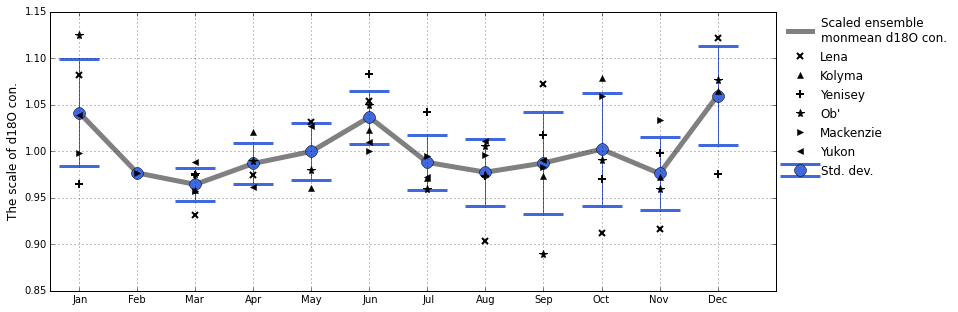

In [187]:
fig = plt.figure(figsize=(13, 5))
ax = fig.gca(); ax.grid()
ax.plot(t, meand18O, '-', color='gray', linewidth=5, label='Scaled ensemble\nmonmean d18O con.')
ax.errorbar(t, meand18O, yerr=errbar, fmt='o', ms=12, mfc=RB, ecolor=RB, capthick=3, capsize=20, label='Std. dev.');
ax.plot(t, alld18O[0, :].T, 'x', ms=6, mew=2, color='k', label = 'Lena');
ax.plot(t, alld18O[1, :].T, '^', ms=6, mew=0.5, color='k', label = 'Kolyma');
ax.plot(t, alld18O[2, :].T, '+', ms=8, mew=2, color='k', label = 'Yenisey');
ax.plot(t, alld18O[4, :].T, '*', ms=8, mew=1, color='k', label = "Ob'");
ax.plot(t, alld18O[3, :].T, '>', ms=6, mew=0.5, color='k', label = 'Mackenzie');
ax.plot(t, alld18O[5, :].T, '<', ms=6, mew=0.5, color='k', label = 'Yukon');
LG = ax.legend(numpoints=1, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)  
ax.set_ylabel('The scale of d18O con.', fontsize=12)
ax.set_xlim(0.5, 13); ax.set_ylim(0.85, 1.15)
ax.set_xticks(range(1, 13)); ax.set_xticklabels(Mon)
plt.show()

# Flow-weighted end member values

In [37]:
Lena_discharge = np.ones(len(Lena_time))
Kolyma_discharge = np.ones(len(Kolyma_time))
Yenisey_discharge = np.ones(len(Yenisey_time))
Mackenzie_discharge = np.ones(len(Mackenzie_time))
Ob_discharge = np.ones(len(Ob_time))
Yukon_discharge = np.ones(len(Yukon_time))
for j in range(len(date_full)):
    for i1 in range(len(Lena_time)):
        if date_full[j]==Lena_time[i1]:
            Lena_discharge[i1] = Lena_discharge_full[j]
    for i2 in range(len(Kolyma_time)):
        if date_full[j]==Kolyma_time[i2]:
            Kolyma_discharge[i2] = Kolyma_discharge_full[j]
    for i3 in range(len(Yenisey_time)):
        if date_full[j]==Yenisey_time[i3]:
            Yenisey_discharge[i3] = Yenisey_discharge_full[j]
    for i4 in range(len(Mackenzie_time)):
        if date_full[j]==Mackenzie_time[i4]:
            Mackenzie_discharge[i4] = Mackenzie_discharge_full[j]
    for i5 in range(len(Ob_time)):
        if date_full[j]==Ob_time[i5]:
            Ob_discharge[i5] = Ob_discharge_full[j]
    for i6 in range(len(Yukon_time)):
        if date_full[j]==Yukon_time[i6]:
            Yukon_discharge[i6] = Yukon_discharge_full[j]

In [47]:
FW_Lena      = np.sum(Lena_d18O     * Lena_discharge)     /np.sum(Lena_discharge)
FW_Kolyma    = np.sum(Kolyma_d18O   * Kolyma_discharge)   /np.sum(Kolyma_discharge)
FW_Yenisey   = np.sum(Yenisey_d18O  * Yenisey_discharge)  /np.sum(Yenisey_discharge)
FW_Mackenzie = np.sum(Mackenzie_d18O* Mackenzie_discharge)/np.sum(Mackenzie_discharge)
FW_Ob        = np.sum(Ob_d18O       * Ob_discharge)       /np.sum(Ob_discharge)
FW_Yukon     = np.sum(Yukon_d18O    * Yukon_discharge)    /np.sum(Yukon_discharge)

In [90]:
import matplotlib.ticker as mtick

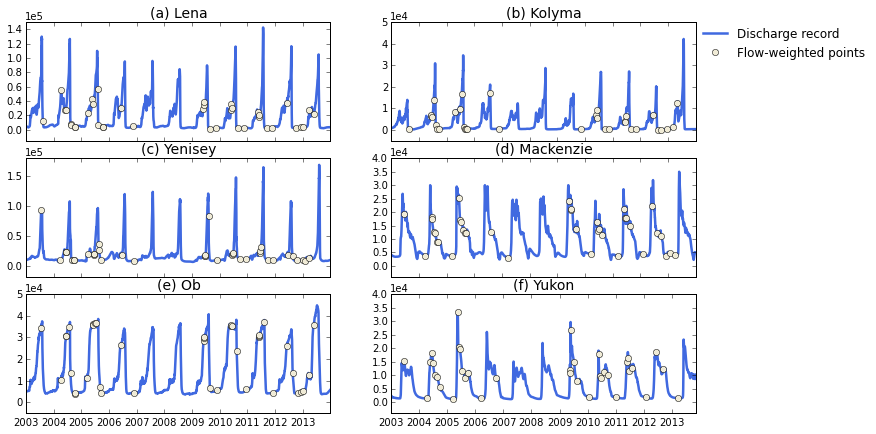

In [192]:
fig, AX = mutifig6()
for i in range(6):
    AX[i].yaxis.get_major_formatter().set_powerlimits((0, 1))

AX[0].plot(date_full, Lena_discharge_full, color=RB, lw=2.5)
AX[0].plot(Lena_time, Lena_discharge, 'ko', color=EG)
AX[0].set_ylim(-15000, 150000); 
AX[0].set_title('(a) Lena', fontsize=14)
AX[0].tick_params(labelbottom='off') 

AX[1].plot(date_full, Kolyma_discharge_full, color=RB, lw=2.5, label='Discharge record')
AX[1].plot(Kolyma_time, Kolyma_discharge, 'ko', color=EG, label='Flow-weighted points')
AX[1].set_ylim(-5000, 50000); 
AX[1].set_title('(b) Kolyma', fontsize=14)
AX[1].tick_params(labelbottom='off')
LG = AX[1].legend(numpoints=1, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)

AX[2].plot(date_full, Yenisey_discharge_full, color=RB, lw=2.5)
AX[2].plot(Yenisey_time, Yenisey_discharge, 'ko', color=EG)
AX[2].set_ylim(-18000, 180000); 
AX[2].set_title('(c) Yenisey', fontsize=14)
AX[2].tick_params(labelbottom='off') 

AX[3].plot(date_full, Mackenzie_discharge_full, color=RB, lw=2.5)
AX[3].plot(Mackenzie_time, Mackenzie_discharge, 'ko', color=EG)
AX[3].set_ylim(-4000, 40000); 
AX[3].set_title('(d) Mackenzie', fontsize=14)
AX[3].tick_params(labelbottom='off') 

AX[4].plot(date_full, Ob_discharge_full, color=RB, lw=2.5)
AX[4].plot(Ob_time, Ob_discharge, 'ko', color=EG)
AX[4].set_ylim(-5000, 50000); 
AX[4].set_title('(e) Ob', fontsize=14) 

AX[5].plot(date_full, Yukon_discharge_full, color=RB, lw=2.5)
AX[5].plot(Yukon_time, Yukon_discharge, 'ko', color=EG)
AX[5].set_ylim(-4000, 40000); 
AX[5].set_title('(f) Yukon', fontsize=14)

In [165]:
proxy_x = [1, 2, 3, 4, 5, 6]; proxy_xmid = [1.309, 2.309, 3.309, 4.309, 5.309, 6.309]
FW = [FW_Lena, FW_Kolyma, FW_Yenisey, FW_Mackenzie, FW_Ob, FW_Yukon]
YERR = [np.std(Lena_d18O), np.std(Kolyma_d18O), np.std(Yenisey_d18O), np.std(Mackenzie_d18O), np.std(Ob_d18O), np.std(Yukon_d18O)] 
river_name = ['Lena', 'Kolyma', 'Yenisey', 'Mackenzie', 'Ob', 'Yukon']

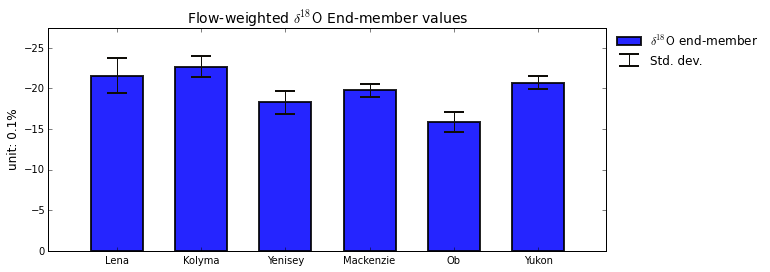

In [190]:
plt.figure(figsize=(10, 4))
ax=plt.gca(); ax.invert_yaxis(); ax.set_ylim(0, -27.5); ax.set_xlim(0.5, 7.118)
ax.bar(proxy_x, FW, width=0.618, lw=2, alpha=0.85, label='$\mathsf{\delta^{18}O}$ end-member') 
ax.errorbar(proxy_xmid, FW, yerr=YERR, fmt='o', ms=0, ecolor=SB, capthick=2, capsize=10, label='Std. dev.')
LG = ax.legend(numpoints=1, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
ax.set_xticklabels(river_name); ax.set_xticks(proxy_xmid)
ax.set_ylabel('unit: 0.1%', fontsize=12) #‰
ax.set_title('Flow-weighted $\mathsf{\delta^{18}O}$ End-member values', fontsize=14)

**Yamamoto-Kawai (2005)**

<img src="_figures/d18O_Yamamoto.PNG" width=650 align="left"/>